In [1306]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** 2

**Author 1 (sciper):** Camille Delgrange (282250)  
**Author 2 (sciper):** Chiara Maria Matti (350647)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

In [1307]:
# Include the path to the folder containing the images of the project description:
PATH_EXAMPLE = "data_project/project_description/"

# Show the images in the notebook:
def show_image(image: Union[str, np.ndarray]):
    if isinstance(image, str):
        image = PIL.Image.open(image)
    # display images in smaller size:
    image.thumbnail((400, 400), PIL.Image.LANCZOS)
    display(image)

# Show the images from the PATH_EXAMPLE folder:
def show_example_images():
    # include jpg images:
    for image_path in glob(PATH_EXAMPLE + "*.jpg"):
        show_image(image_path)
    for image_path in glob(PATH_EXAMPLE + "*.png"):
        show_image(image_path)

show_example_images()

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:

<img src="data_project/project_description/train_00.png" width="512"/>

### Example puzzle content
Example of input of solved puzzles. 
Solution 1  
<img src="data_project/project_description/solution_example.png" width="512"/>  
Solution 2  
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each input image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image and M images, and each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [1308]:
## load images
import os 
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt


In [1310]:
# Set the path to the dataset folder:
dataset_path = 'data_project/'

# Set the path to the images folder:
images_path = dataset_path + 'train/'

# Look at folder content:
os.listdir(images_path)

['train_00.png',
 'train_01.png',
 'train_02.png',
 'train_03.png',
 'train_04.png',
 'train_05.png',
 'train_06.png',
 'train_07.png',
 'train_08.png',
 'train_09.png',
 'train_10.png',
 'train_11.png']

In [1311]:

def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [1312]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

data_project\train_solution_06


In [1313]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
data_project\train_solution_00
solving  10
data_project\train_solution_00


In [1314]:
import cv2
from scipy import stats


In [2267]:
def segment_image(img):
    """
    Segment the image to retrieve the tiles. The function converts the image to HSV and performs k-means clustering (k=2)

    """

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    blur = cv2.GaussianBlur(hsv, (5,5), 10)
    # hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

    # reshape the image to a 2D array of pixels and 3 color values (HSV)
    # blur_0 = blur[:,:,0]
    im_reshaped = blur.reshape((-1,3))
    im_reshaped = np.float32(im_reshaped)
    # define and apply k-means clustering to separate the background and the tiles
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)

    # # OPTION 1 
    K = 2
    ret,label,center=cv2.kmeans(im_reshaped,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # reshape the result and convert back to uint8 and define a mask
    center = np.uint8(center)
    mask = center[label.flatten()]
    vals = np.unique(mask, axis=0)
    mask[np.all(mask == vals[0], axis=1)] = 0
    mask[np.all(mask == vals[1], axis=1)] = 255
    mask = mask.reshape((blur.shape))

    # put to black the background and white the objects
    if np.sum(mask == 255) > np.sum(mask == 0):
        mask_def = ~mask
        print("inverted")
    else:
        mask_def = mask
        print("not inverted")


    

    # OPTION 2
    # K = 4
    # ret,label,center=cv2.kmeans(im_reshaped,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # # reshape the result and convert back to uint8 and define a mask
    # center = np.uint8(center)
    # mask = center[label.flatten()]
    # mask = mask.reshape((blur.shape))
    # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # c = Counter(mask.ravel())
    # mc = c.most_common(2)
    # print(mc)
    # if np.unique(mask).shape[0] == 4:
    #     mc = [x[0] for x in mc]
    #     mask_def = ~((mask == mc[0]) | (mask == mc[1]))
    # else: 
    #     mc = mc[0][0]
    #     mask_def = ~(mask == mc) 

    

    # plt.imshow(mask_def,  cmap = 'gray')
    return mask_def
    


    

In [2230]:
def apply_may_morph(mask):
    """
    Apply morphological operations to the mask to remove noise and fill in holes
    """
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
    kernel_close =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))

    mask_dilate = cv2.dilate(mask.astype(np.uint8), kernel_dilate, iterations=9)
    mask_erode = cv2.erode(mask_dilate, kernel_erode, iterations=7)
    mask_open = cv2.morphologyEx(mask_erode, cv2.MORPH_OPEN, kernel_open, iterations=6)
    mask_close = cv2.morphologyEx(mask_open, cv2.MORPH_CLOSE, kernel_close, iterations=6)

    return mask_close

In [2269]:
def get_contours(img, mask):
    """
    Get the contours of the objects in the mask
    """
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    final_contours = []
    coords = []
    im_draw = img.copy()

    for cnt in contours:
        x1, y2 = cnt[0][0]
        approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True)

        if len(approx) == 4:
            rect = cv2.minAreaRect(cnt)
            (x, y), (w, h), a = rect
            ratio = float(w)/h
            if 0.8 < ratio < 1.2:
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                if cv2.contourArea(box) > 7000:
                    im_draw = cv2.drawContours(im_draw, [box], 0, (0, 255, 0), 4)
                    final_contours.append(box)
                    coords.append(box[0])
            else:
                im_draw = cv2.drawContours(im_draw, [cnt], 0, (255, 0, 0), 4)

    

    return final_contours, coords, im_draw

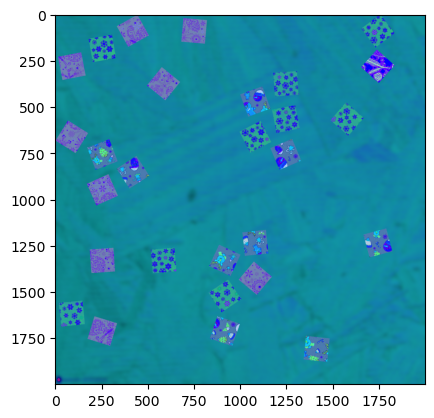

In [2243]:
im = load_input_image(0)
hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# # blur = cv2.GaussianBlur(im, (5,5), 10)
# # hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)
plt.imshow(hsv);
# plt.imshow(im);

In [2244]:
# plt.hist(cv2.cvtColor(im, cv2.COLOR_RGB2HSV)[:,:,0].flatten(), bins=50, color='r', alpha=0.5);

In [2245]:
#linear regrssion y = pixel color


In [2246]:
# plt.hist(im[:,:,0].ravel(),256,[0,256]); plt.show()

[(129, 2369108), (127, 1307587)]


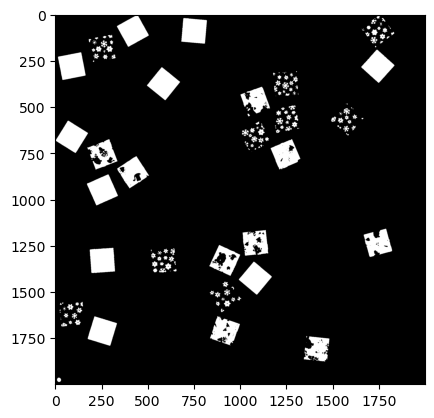

In [2247]:
md = segment_image(im)
plt.imshow(md, cmap = 'gray')

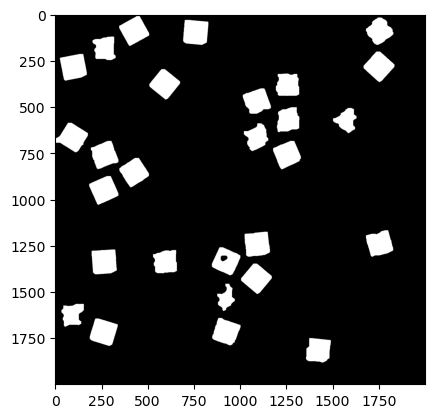

In [2248]:
res = apply_may_morph(md)
plt.imshow(res,  cmap = 'gray');

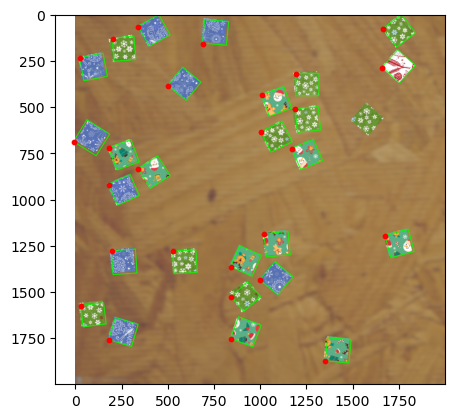

In [2249]:
final_contours, coords, im_draw = get_contours(im, res)
plt.imshow(im_draw);
plt.scatter([x for x,y in coords], [y for x,y in coords], c='r', s=10)

not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
not inverted
inverted
inverted
not inverted


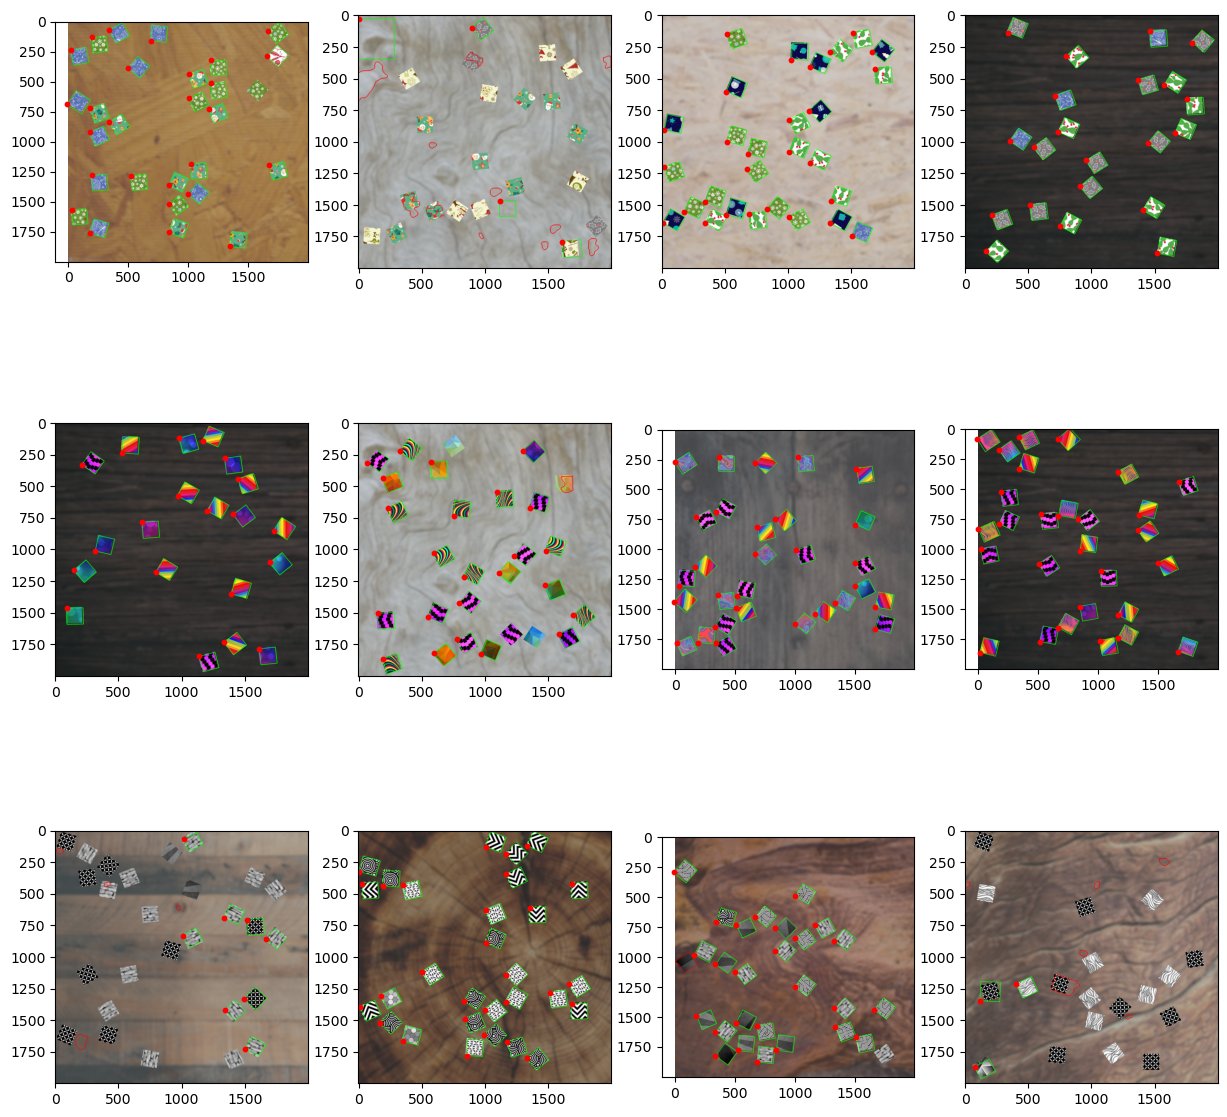

In [2270]:
ls = [str(i) for i in range(12)]
# fig, ax = plt.subplot_mosaic([ls], figsize=(15, 15))
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    im = load_input_image(i)
    md = segment_image(im)
    res = apply_may_morph(md)
    final_contours, coords, im_draw = get_contours(im, res)
    
    ax.imshow(im_draw);
    ax.scatter([x for x,y in coords], [y for x,y in coords], c='r', s=10)
    # ax[ls[i]].show()

# WORKING SPACE

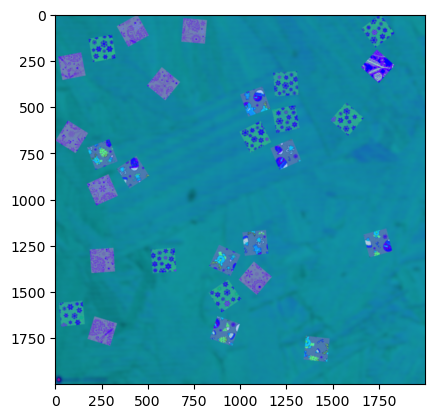

In [2250]:
# gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# split = cv2.split(im)
# hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
# hsi = cv2.cvtColor(hsv, cv2.COLOR_BGR2HLS)
# blur = cv2.GaussianBlur(hsv, (9,9), 10)
# blur_kernel = np.ones((5,5), np.float32)/9
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# blur = cv2.filter2D(hsv, -1, blur_kernel)
# lab = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
# # hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2LAB)
# # Threshold and morph close
# # thresh = cv2.threshold(sharpen, 160, 255, cv2.THRESH_BINARY_INV)[1]
# # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# # close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
# blur = cv2.GaussianBlur(hsv, (5,5), 10)
# hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
blur = cv2.GaussianBlur(hsv, (5,5), 10)

plt.imshow(blur);

c:\Users\chiar\.conda\envs\iapr\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


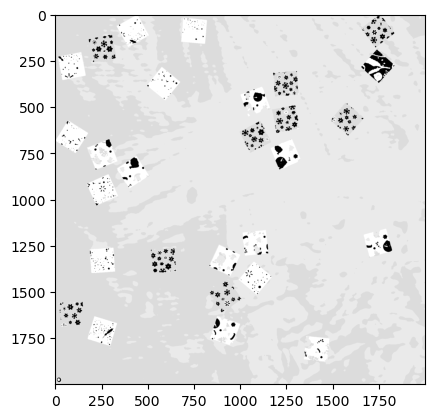

In [2251]:
image_spot_reshaped = blur.reshape((blur.shape[0] * hsv.shape[1], 3))

# convert to np.float32
Z = np.float32(image_spot_reshaped)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((hsv.shape))
res2_gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
# res2_gray[res2_gray == np.min(res2_gray)] = 0
# res2_gray[res2_gray == np.max(res2_gray)] = 255


plt.imshow(res2_gray, cmap = 'gray')

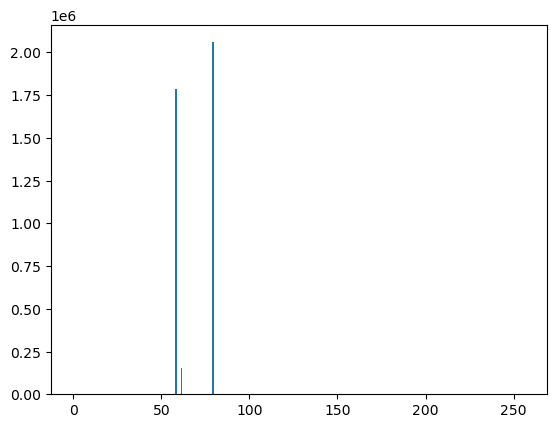

In [2096]:
plt.hist(res2_gray.ravel(),256,[0,256]); plt.show()

In [2098]:
np.unique(res2_gray).shape[0]

4

In [2227]:
from collections import Counter
c = Counter(res2_gray.ravel())
mc = c.most_common(2)
if np.unique(res2_gray).shape[0] == 4:
    mc = [x[0] for x in mc]
    masked = (res2_gray == mc[0]) | (res2_gray == mc[1])
else: 
    mc = mc[0][0]
    masked = (res2_gray == mc) 
mc

[62, 79]

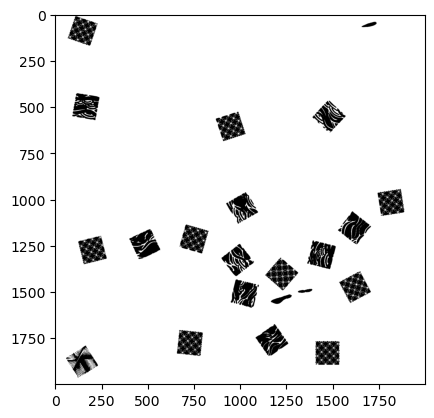

In [2228]:

plt.imshow(masked, cmap = 'gray')

In [527]:
# img_temp = hsv.copy()
# unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
# print(unique[np.argmax(counts)])
# print(max(counts))

# fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].hist(hsv[:,:,0].ravel(), bins=256, range=(0,256))
# ax[0].scatter(unique[np.argmax(counts)][0], 0, color='r')
# ax[1].hist(hsv[:,:,1].ravel(), bins=256, range=(0,256))
# ax[1].vlines(unique[np.argmax(counts)][1], 0, 10000, color='r')
# ax[2].hist(hsv[:,:,2].ravel(), bins=256, range=(0,256))
# ax[2].vlines(unique[np.argmax(counts)][2], 0, 10000, color='r')
# ax[0].set_title('Hue')
# ax[1].set_title('Saturation')
# ax[2].set_title('Value')

In [884]:
np.unique(res2_gray, return_counts=True)

(array([  0, 106, 122, 255], dtype=uint8),
 array([ 240017, 2028951, 1602517,  128515], dtype=int64))

In [892]:
if K==4:
    mask = (res2_gray == 0) | (res2_gray == 255)

In [1799]:
import itertools
masks = []
for i in range(3):
    # m = unique[np.argmax(counts)][i]
    # s = 50
    m = np.argmax(np.bincount(hsv[:,:,i].ravel() ))
    s = np.std(hsv[:,:,i].ravel())
    print(m,s)
    if m == 0:
        masks.append(((hsv[:,:,i] >= 0) & (hsv[:,:,i] <= s)))
    elif m == 255:
        masks.append(((hsv[:,:,i] >= (255-s)) & (hsv[:,:,i] <= 255)))
    else:
        masks.append(((hsv[:,:,i] >= (m-s)) & (hsv[:,:,i] <= (m+s))))

sum_masks = 0
# for i, comb in enumerate(itertools.combinations(masks, 1)):
#     m = comb[0]
#     # if (np.sum(m) > sum_masks) & (np.sum(m) > 0.9*18*128*128) & (np.sum(m) < 1.1*128*128*51):
#     # if (np.sum(m) > sum_masks):
#     if (np.sum(m) > sum_masks) & (np.sum(m) > 1.1*128*128*51):
#         sum_masks = np.sum(m)
#         mask = m
        # print(i)
# for i, comb in enumerate(itertools.combinations(masks, 2)):
#     m = comb[0] & comb[1]
#     # if (np.sum(m) > sum_masks):
#     if (np.sum(m) > sum_masks) & (np.sum(m) > 1.1*128*128*51):
#     # if (np.sum(m) > sum_masks)& (np.sum(m) > 0.8*18*128*128) & (np.sum(m) < 1.2*128*128*51):
#         sum_masks = np.sum(m)
#         mask = m
#         print(i+3)
for i, comb in enumerate(itertools.combinations(masks, 3)):
    m = comb[0] & comb[1] & comb[2]
    # if (np.sum(m) > sum_masks):
    if (np.sum(m) > sum_masks) & (np.sum(m) > 1.1*128*128*51):
    # if (np.sum(m) > sum_masks)& (np.sum(m) > 0.8*18*128*128) & (np.sum(m) < 1.2*128*128*51):
        sum_masks = np.sum(m)
        mask = m
        print(i)
if sum_masks == 0:
    for i, comb in enumerate(itertools.combinations(masks, 2)):
        m = comb[0] & comb[1]
        if (np.sum(m) > sum_masks):
        # if (np.sum(m) > sum_masks) & (np.sum(m) > 1.1*128*128*51):
        # if (np.sum(m) > sum_masks)& (np.sum(m) > 0.8*18*128*128) & (np.sum(m) < 1.2*128*128*51):
            sum_masks = np.sum(m)
            mask = m
            print(i+3)
if sum_masks == 0:
    for i, comb in enumerate(itertools.combinations(masks, 1)):
        m = comb[0]
        # if (np.sum(m) > sum_masks) & (np.sum(m) > 0.9*18*128*128) & (np.sum(m) < 1.1*128*128*51):
        if (np.sum(m) > sum_masks):
        # if (np.sum(m) > sum_masks) & (np.sum(m) > 1.1*128*128*51):
            sum_masks = np.sum(m)
            mask = m
            print(i)

    
    
    

90 28.317649631082467
3 29.197140003984938
168 18.96449076763848
0


In [891]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

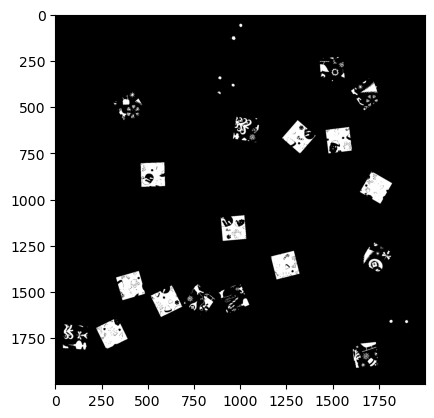

In [1800]:
mask = res2_gray
if np.sum(mask == True) < np.sum(mask == False):
    mask_def = ~mask
    print("inverted")
else:
    mask_def = mask
plt.imshow(mask_def, cmap = 'gray')

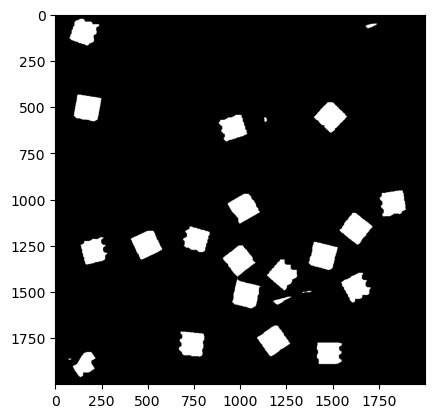

In [2107]:
mask_def = md
kernel_o = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
kernel_d = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
# opening = cv2.morphologyEx(mask_def.astype(np.uint8), cv2.MORPH_OPEN, kernel_o, iterations=4)

dilated = cv2.dilate(mask_def.astype(np.uint8), kernel_d, iterations=6)
# opening = cv2.morphologyEx(dilated.astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=4)
eroded = cv2.erode(dilated.astype(np.uint8), kernel_e, iterations=4)
opening = cv2.morphologyEx(eroded.astype(np.uint8), cv2.MORPH_OPEN, kernel, iterations=4)
closing = cv2.morphologyEx(opening.astype(np.uint8), cv2.MORPH_CLOSE, kernel_c, iterations=8)
# eroded = cv2.erode(closing.astype(np.uint8), kernel_e, iterations=4)
# edges = cv2.Canny(dilated, 0, 255, apertureSize=5)
plt.imshow(closing, cmap = 'gray')


In [1173]:
closing.shape

(2000, 2000, 3)

In [868]:
cv2.approxPolyDP(contours[0], 0.1*cv2.arcLength(contours[0], True), True)

array([[[1498,  159]],

       [[ 947, 1754]]], dtype=int32)

In [1174]:
cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY).shape

(2000, 2000)

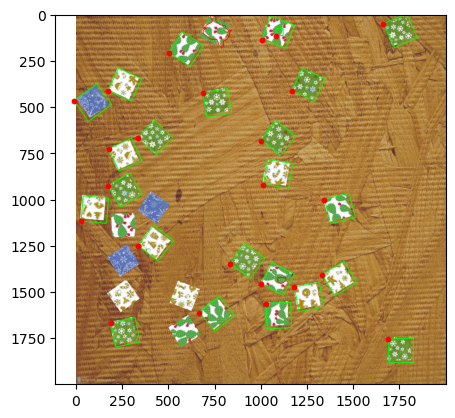

In [1175]:
closing = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]
final_contours = []
coords = []
im_draw = im.copy()
for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      rect= cv2.minAreaRect(cnt)
      (c1, c2), (w, h), a = rect
      # print(c1, c2, x, y, a)
      # box = cv2.boxPoints(rect)
      # box = np.int0(box)
      # cv2.drawContours(img,[box],0,(0,0,255),2)
      # x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.8 and ratio <= 1.2:
         box = cv2.boxPoints(rect)
         box = np.int0(box)
         # print(box)
         im_draw = cv2.drawContours(im_draw, [box], -1, (0,255,0), 4)
         final_contours.append(box)
         coords.append(box[0])
        #  cv2.putText(im_draw, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
        #  cv2.putText(im_draw, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         im_draw = cv2.drawContours(im_draw, [cnt], -1, (255,0,0), 4)
      


# cv2.drawContours(im_draw, contours, -1, (0,255,0), 3)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c='r', s=10)

In [257]:
len(final_contours)

21

## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
